# DSC540 Final Project

DePaul University  
Ghani, Yaseen\
Katta, Vibhav Reddy\
Nagabhyru, Lakshmi Sowjanya\
O'kwu, Kenneth\
Shafikhani, Sasan\
Surve, Aniket Nitin\
Thummala, Keerthesh Reddy\
Chicago, IL

We decided to use the following credit data set from Kaggle\
https://www.kaggle.com/datasets/conorsully1/credit-score\
This dataset provides 2 target variables. One continuous one called Credit_Score, and the other is called Default which is a 0/1 values for if the individual has defaulted or not.\
The original data set has a few categorical variables and several continious variables such as income and variables that start with R_. R_ variables are ratios of other variables and we decided to remove them since they are values we are able to calculate. As for the rest of the data, we created dummy variables for the categorical data as shown in the Preprocessing\
Overall. We removed all of the variables with ratios, we also decided to use the data variables which end in _6. The original data set had both _6 and _12 denoting 6 months and 12 months of data. These variables all has very high correlations and it would have not made sense to keep them in there since it would cause overfitting to have both the 6 and 12 month variables

Our goal was to use this dataset to attempt various machine learning methods and determining if we are able to determine a good way to predict defaulting and credit score for all income ranges. Based on the EDA we can see clear skew towards the lower income ranges which is expected as income cannot fall below 0. While we may get siginificantly higher model accuracies removing the outliers (the high income ranges) that defeats the purpose of the work, which is to create an overall model for all income ranges

### Packages Imported

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [2]:

file_path = 'credit_score.csv'
df = pd.read_csv(file_path)

# Remove all the variables starting with R_
df = df.loc[:, ~df.columns.str.startswith('R_')]

# Remove all the variables ending with _12
df = df.loc[:, ~df.columns.str.endswith('_12')]

# Remove the customer ID column
df = df.drop(columns=['CUST_ID'])


categorical_columns = ['CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

# Create dummy variables for the categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


# Gambling is separating because it does not need drop_first=True

Gambling=['CAT_GAMBLING']
df = pd.get_dummies(df, columns=Gambling)

# Save the processed dataframe to a new CSV file
df.to_csv('processed_credit_score.csv', index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   INCOME                 1000 non-null   int64
 1   SAVINGS                1000 non-null   int64
 2   DEBT                   1000 non-null   int64
 3   T_CLOTHING_6           1000 non-null   int64
 4   T_EDUCATION_6          1000 non-null   int64
 5   T_ENTERTAINMENT_6      1000 non-null   int64
 6   T_FINES_6              1000 non-null   int64
 7   T_GAMBLING_6           1000 non-null   int64
 8   T_GROCERIES_6          1000 non-null   int64
 9   T_HEALTH_6             1000 non-null   int64
 10  T_HOUSING_6            1000 non-null   int64
 11  T_TAX_6                1000 non-null   int64
 12  T_TRAVEL_6             1000 non-null   int64
 13  T_UTILITIES_6          1000 non-null   int64
 14  T_EXPENDITURE_6        1000 non-null   int64
 15  CREDIT_SCORE           1000 non-null   

In [41]:
# missing data
missing_data = df.isnull().sum()
print(missing_data)

INCOME                   0
SAVINGS                  0
DEBT                     0
T_CLOTHING_6             0
T_EDUCATION_6            0
T_ENTERTAINMENT_6        0
T_FINES_6                0
T_GAMBLING_6             0
T_GROCERIES_6            0
T_HEALTH_6               0
T_HOUSING_6              0
T_TAX_6                  0
T_TRAVEL_6               0
T_UTILITIES_6            0
T_EXPENDITURE_6          0
CREDIT_SCORE             0
DEFAULT                  0
CAT_DEBT_1               0
CAT_CREDIT_CARD_1        0
CAT_MORTGAGE_1           0
CAT_SAVINGS_ACCOUNT_1    0
CAT_DEPENDENTS_1         0
CAT_GAMBLING_High        0
CAT_GAMBLING_Low         0
CAT_GAMBLING_No          0
binned                   0
dtype: int64


No missing data

## Exploratory Data Analysis

### Correlation Matrix

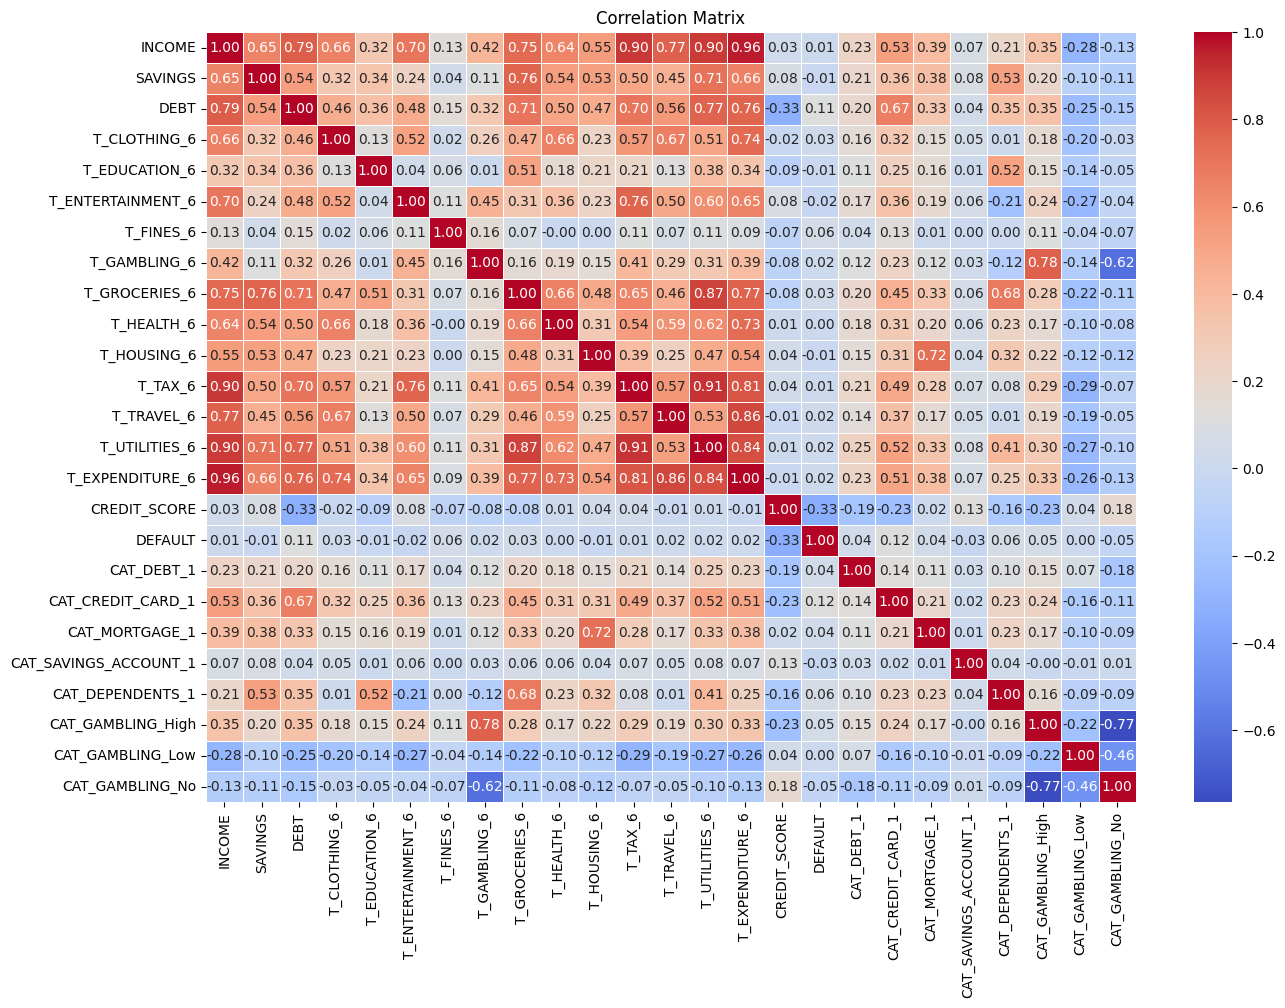

In [3]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Variables with over 0.9 correlation

In [4]:
high_corr = corr_matrix[(corr_matrix > 0.9) & (corr_matrix != 1.0)]
high_corr_pairs = high_corr.unstack().dropna().to_dict()
high_corr_pairs = {k: v for k, v in high_corr_pairs.items() if not np.isnan(v)}
print("Correlations greater than 0.9:")
for (var1, var2), corr in high_corr_pairs.items():
    print(f"{var1} and {var2}: {corr}")

Correlations greater than 0.9:
INCOME and T_EXPENDITURE_6: 0.9594424291739285
T_TAX_6 and T_UTILITIES_6: 0.9124120502849324
T_UTILITIES_6 and T_TAX_6: 0.9124120502849324
T_EXPENDITURE_6 and INCOME: 0.9594424291739285


### Boxplots

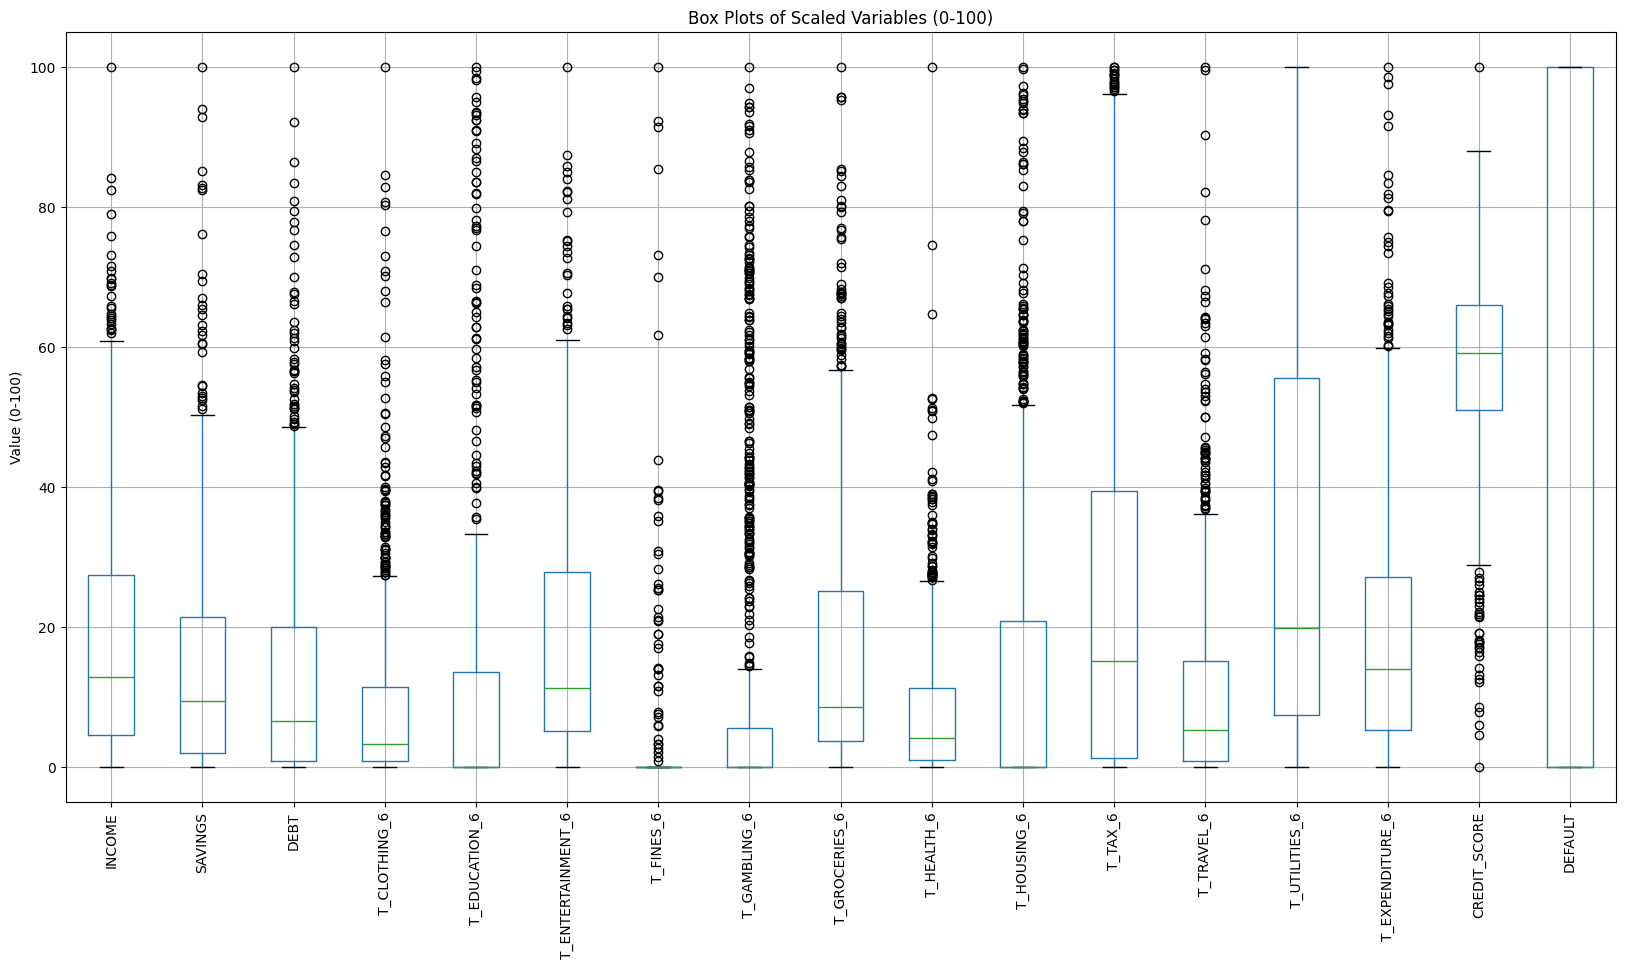

In [5]:

from sklearn.preprocessing import MinMaxScaler

# Load the processed dataset
file_path = 'processed_credit_score.csv'
df = pd.read_csv(file_path)

# Remove categorical variables starting with 'CAT_'
df = df.loc[:, ~df.columns.str.startswith('CAT_')]

# Scale the data to the range 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Create box plots to show skewness
plt.figure(figsize=(20, 10))
scaled_df.boxplot(rot=90)
plt.title('Box Plots of Scaled Variables (0-100)')
plt.ylabel('Value (0-100)')
plt.show()

Here, we can see the skew I had discussed earlier. While we can see that there are a lot of options for outliers across the board, The goal of this is to attempt an overall model

## Machine Learning Models

### **Train Test Split**
Now its time to split our data into a training set and a validation set!

The not.fully.paid variable is the one that we will try to predict.



In [6]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
file_path = 'processed_credit_score.csv'
df = pd.read_csv(file_path)
X = df.drop('CREDIT_SCORE',axis=1)
y = df['CREDIT_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [7]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)


In [8]:
X_train.shape

(720, 24)

In [9]:
X_val.shape

(180, 24)

In [10]:
X_test.shape

(100, 24)

### **Linear Regression**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#Linear Regression
estimator = LinearRegression()
estimator.fit(X_train, y_train)
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.4979511572301971
𝑅2 on validation data 0.4734844298720762
RMSE on training data: 45.184783271059764
RMSE on validation data: 46.932214696263124


### **Random Forest Regression**

In [12]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
estimator.fit(X_train, y_train)
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.9497701216665728
𝑅2 on validation data 0.6780828190400092
RMSE on training data: 14.292239376280012
RMSE on validation data: 36.69758772726076


### **SVM Regressors**

1.   Linear kernel SVR
2.   Polynomial kernel SVR
3.   RBF kernel SVR





In [13]:
from sklearn.svm import SVR

**Linear SVM Regressor**

In [14]:
estimator = SVR(kernel='linear')
estimator.fit(X_train, y_train)
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.411001815829963
𝑅2 on validation data 0.3848590348063893
RMSE on training data: 48.941378344204615
RMSE on validation data: 50.728586844274695


**Polynomial Kernel SVM Regressor**

In [15]:
estimator = SVR(kernel='poly')
estimator.fit(X_train, y_train)
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.16111885997238484
𝑅2 on validation data 0.1254434930445223
RMSE on training data: 58.40760973994974
RMSE on validation data: 60.48662840422241


**RBF Kernel SVM Regressor**

In [16]:
estimator = SVR(kernel='rbf')
estimator.fit(X_train, y_train)
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.11675858608667322
𝑅2 on validation data 0.1078705095532495
RMSE on training data: 59.93202203182498
RMSE on validation data: 61.09130287127911


# **Applying PCA**

[0.37387815 0.47080503 0.56219535 0.6200045  0.67251168 0.71793685
 0.76007486 0.80032698 0.83601561 0.86719334 0.89481195 0.91918258
 0.93831602 0.95037745 0.96199058 0.97306992 0.98126746 0.98912824
 0.99577767 0.99878605 0.99957112 1.         1.         1.        ]


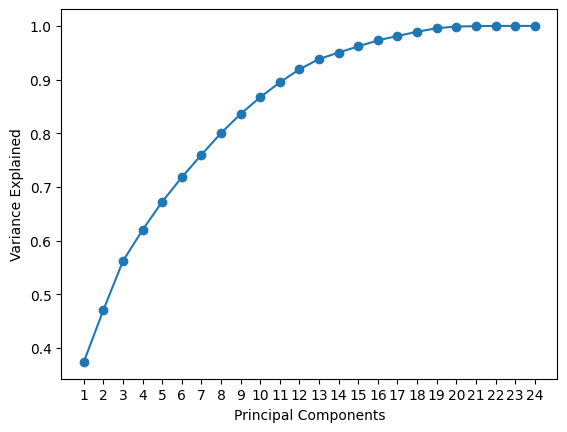

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
X_train_pca2 = X_train_pca[:, 0:15]
X_val_pca2 = X_val_pca[:, 0:15]
X_test_pca2 = X_test_pca[:, 0:15]

In [19]:
#Linear Regression with PCA
estimator = LinearRegression()
estimator.fit(X_train_pca2, y_train)
pred_train = estimator.predict(X_train_pca2)
pred_val = estimator.predict(X_val_pca2 )
#Print Results
print("Linear Regression with PCA\n")
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)),"\n")


# Random Forest with PCA
estimator = RandomForestRegressor()
estimator.fit(X_train_pca2, y_train)
pred_train = estimator.predict(X_train_pca2)
pred_val = estimator.predict(X_val_pca2 )
#Print Results
print("Random Forest with PCA\n")

print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)),"\n")

# SVM Regression with PCA
estimator = SVR(kernel='linear')
estimator.fit(X_train_pca2, y_train)
pred_train = estimator.predict(X_train_pca2)
pred_val = estimator.predict(X_val_pca2 )
#Print Results
print("SVM Regression with PCA\n")
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)),"\n")


Linear Regression with PCA

𝑅2 on training data: 0.3978451965395896
𝑅2 on validation data 0.3863355985228565
RMSE on training data: 49.48496824479502
RMSE on validation data: 50.667666666423465 

Random Forest with PCA

𝑅2 on training data: 0.9327173810891723
𝑅2 on validation data 0.4899660104411142
RMSE on training data: 16.54133899759428
RMSE on validation data: 46.19181200289842 

SVM Regression with PCA

𝑅2 on training data: 0.35944326242365265
𝑅2 on validation data 0.3464918630461613
RMSE on training data: 51.03851386469424
RMSE on validation data: 52.28666463845873 



### **Using SVM and performing Hyperparameter Tuning**

In [20]:
from sklearn.model_selection import GridSearchCV
estimator = SVR(kernel='linear')
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1]}
grid_s = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2', cv=4, n_jobs=-1)
grid_s.fit(X_train, y_train)
estimator = grid_s.best_estimator_
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.45059055285190075
𝑅2 on validation data 0.4070684422782208
RMSE on training data: 47.268005761109016
RMSE on validation data: 49.80440111013091


### **Applying feature engineering and Ensemble Methods for Random Forest Regressor**

### Polynomial features

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

estimator = RandomForestRegressor()
estimator.fit(X_train_poly, y_train)
pred_train = estimator.predict(X_train_poly)
pred_val = estimator.predict(X_val_poly)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.9484051729365404
𝑅2 on validation data 0.6686502838546198
RMSE on training data: 14.485126720574838
RMSE on validation data: 37.23134630627501


### Ensemble Method

In [22]:
#Ensemble Method
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
estimator.fit(X_train, y_train)
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)
#Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

𝑅2 on training data: 0.9497701216665728
𝑅2 on validation data 0.6780828190400092
RMSE on training data: 14.292239376280012
RMSE on validation data: 36.69758772726076


**Regularization with Lasso (L1) for Linear Regression**

In [23]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [24]:
# Create a pipeline that standardizes the data then applies LassoCV
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=None, cv=10, max_iter=10000))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Extract the best alpha value from LassoCV
best_alpha = pipeline.named_steps['lassocv'].alpha_
print("Best alpha value:", best_alpha)

# Create and train the Lasso model using the best alpha value
estimator = Lasso(alpha=best_alpha)
estimator.fit(X_train, y_train)  # Ensure X_train is scaled if it wasn't in a pipeline

# Predict on training and validation data
pred_train = estimator.predict(X_train)
pred_val = estimator.predict(X_val)

# Print Results
print('𝑅2 on training data:',metrics.r2_score(y_train, pred_train))
print('𝑅2 on validation data',metrics.r2_score(y_val, pred_val))
print('RMSE on training data:',np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('RMSE on validation data:',np.sqrt(metrics.mean_squared_error(y_val, pred_val)))

Best alpha value: 0.12413508684940955
𝑅2 on training data: 0.49675781639688743
𝑅2 on validation data 0.48167073747139844
RMSE on training data: 45.23845219595056
RMSE on validation data: 46.56593239535875


## Neural Networks for Regression

In [25]:

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Create the neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)

# Step 3: Fit the model to the training data
nn_model.fit(X_train_scaled, y_train)

# Step 4: Predict on training and validation data
pred_train = nn_model.predict(X_train_scaled)
pred_val = nn_model.predict(X_val_scaled)

# Step 5: Evaluate the model's performance
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, pred_val))

# Print the results
print('R² on training data:', r2_train)
print('R² on validation data:', r2_val)
print('RMSE on training data:', rmse_train)
print('RMSE on validation data:', rmse_val)

R² on training data: 0.7846161892557459
R² on validation data: 0.4169700785506839
RMSE on training data: 29.595504436149614
RMSE on validation data: 49.38679705098698


##  CatBoost Regressor

In [26]:
from catboost import CatBoostRegressor

# Create the CatBoost model
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=3, random_state=42, verbose=0)

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Predict on training and validation data
pred_train = catboost_model.predict(X_train)
pred_val = catboost_model.predict(X_val)

# Evaluate the model's performance
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, pred_val))

# Print the results
print('R² on training data:', r2_train)
print('R² on validation data:', r2_val)
print('RMSE on training data:', rmse_train)
print('RMSE on validation data:', rmse_val)


R² on training data: 0.9765868413433552
R² on validation data: 0.653832443472663
RMSE on training data: 9.757739560948924
RMSE on validation data: 38.054727872338866


# Gradient Boost Classifier

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building
#### Train the Gradient Boosting Classifier

In [28]:
# Define bins and labels for the binned categories
bins = [300, 550, 600, 650, 700, 750, 800, 850]
labels = ['300-549', '550-599', '600-649', '650-699', '700-749', '750-799', '800-850']

# Bin the credit scores directly
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)

# Check the new distribution of binned scores
print(y_train_binned.value_counts())

CREDIT_SCORE
600-649    290
550-599    237
300-549    181
650-699     82
700-749      9
750-799      1
800-850      0
Name: count, dtype: int64


### Check and plot the calibration curve

In [29]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Calculate class sizes
class_sizes = y_train.value_counts()

# Ensure each class has at least 2 instances by up-sampling small classes manually
X_resampled_list = []
y_resampled_list = []
for class_label, size in class_sizes.items():
    class_indices = y_train[y_train == class_label].index
    X_class = X_train.loc[class_indices]
    y_class = y_train.loc[class_indices]
    
    if size < 2:
        # Manually up-sample the minority class
        X_upsampled, y_upsampled = resample(X_class, y_class, replace=True, n_samples=2, random_state=42)
        X_resampled_list.append(X_upsampled)
        y_resampled_list.append(y_upsampled)
    else:
        X_resampled_list.append(X_class)
        y_resampled_list.append(y_class)

# Concatenate the upsampled data
X_train_augmented = pd.concat(X_resampled_list)
y_train_augmented = pd.concat(y_resampled_list)

# Now apply SMOTE with k_neighbors set to 1 because the smallest class size is 2
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_binned)

### Verify Shape of dataframe - Check Data Sizes

In [30]:
print(X.shape)
print(y_train_binned.shape)

(1000, 24)
(800,)


#### Investigate Data Preparation Steps - Align X and y_train_binned  - Re-create y_train_binned

In [31]:
import pandas as pd

# Example assuming 'CREDIT_SCORE' is in a dataframe df and is the basis for y_train_binned
bins = [300, 549, 599, 649, 699, 749, 799, 850]
labels = ['300-549', '550-599', '600-649', '650-699', '700-749', '750-799', '800-850']

# Bin 'CREDIT_SCORE' directly in your original DataFrame that corresponds to X
df['binned'] = pd.cut(df['CREDIT_SCORE'], bins=bins, labels=labels, include_lowest=True)

# Now set X and y_train_binned from the same DataFrame to ensure they are aligned
X = df.drop(columns=['CREDIT_SCORE', 'binned'])  # assuming you drop original score and output column
y_train_binned = df['binned']

print(X.shape)
print(y_train_binned.shape)

(1000, 24)
(1000,)


## 3. Model Evaluation

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Assuming X is your feature set and y_train_binned is now your target variable
X_train, X_test, y_train_binned_train, y_train_binned_test = train_test_split(X, y_train_binned, test_size=0.2, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_binned_train)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_train_binned_test, y_pred))
print("Accuracy:", accuracy_score(y_train_binned_test, y_pred))

              precision    recall  f1-score   support

     300-549       0.69      0.74      0.71        50
     550-599       0.49      0.42      0.45        60
     600-649       0.55      0.57      0.56        65
     650-699       0.23      0.25      0.24        24
     700-749       0.00      0.00      0.00         1

    accuracy                           0.53       200
   macro avg       0.39      0.40      0.39       200
weighted avg       0.53      0.53      0.52       200

Accuracy: 0.525


### Optimize the model


### Adjust k_neighbors parameter in SMOTE:


In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X is your feature set and y_train_binned is now your target variable
X_train, X_test, y_train_binned_train, y_train_binned_test = train_test_split(X, y_train_binned, test_size=0.2, random_state=42)

# Check class distribution and decide on resampling strategy
if y_train_binned_train.value_counts().min() > 1:
    # Apply SMOTE with adjusted k_neighbors if all classes have at least 2 samples
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train_binned_train.value_counts().min() - 1))
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_binned_train)
else:
    # Use RandomOverSampler as fallback
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_binned_train)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_train_binned_test, y_pred))
print("Accuracy:", accuracy_score(y_train_binned_test, y_pred))

              precision    recall  f1-score   support

     300-549       0.69      0.74      0.71        50
     550-599       0.49      0.42      0.45        60
     600-649       0.55      0.57      0.56        65
     650-699       0.23      0.25      0.24        24
     700-749       0.00      0.00      0.00         1

    accuracy                           0.53       200
   macro avg       0.39      0.40      0.39       200
weighted avg       0.53      0.53      0.52       200

Accuracy: 0.525


### Verify Shape of dataframe - Check Data Sizes

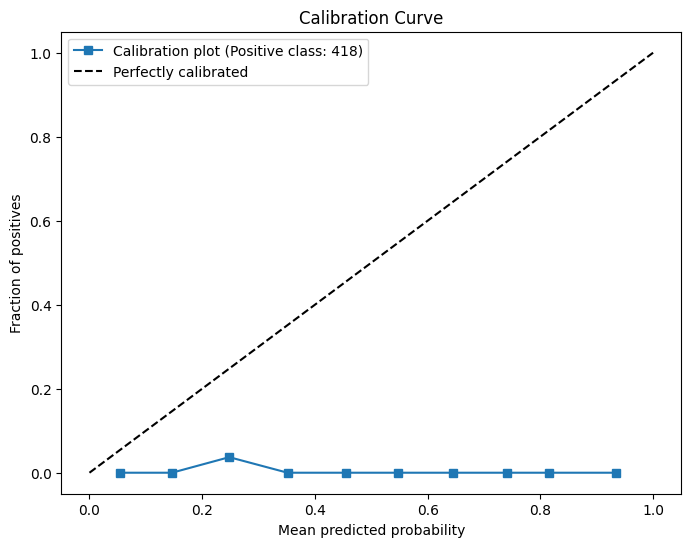

In [34]:
from sklearn.calibration import calibration_curve

# Define the positive class (example: class 418)
positive_class = 418
y_test_binary = (y_test == positive_class).astype(int)

# Get probabilities for the positive class (assuming it's the second column in predict_proba output)
# Adjust the index according to your needs
probabilities = model.predict_proba(X_test)[:, 1]

# Compute the calibration curve
prob_true, prob_pred = calibration_curve(y_test_binary, probabilities, n_bins=10)

# Plotting the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, 's-', label='Calibration plot (Positive class: {})'.format(positive_class))
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Hyperparameter Tuning - Gradient Boost Classifier

### Using Grid Search

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
gbm = GradientBoostingClassifier(random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Configure GridSearchCV
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score: {:.2f}".format(grid_search.best_score_))


c:\Users\champ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best score: 0.02


In [36]:
best_model_grid = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    subsample=1.0,
    random_state=42
)

best_model_grid.fit(X_train_resampled, y_train_resampled)


y_pred = best_model_grid.predict(X_test)


print(classification_report(y_train_binned_test, y_pred))
print("Accuracy:", accuracy_score(y_train_binned_test, y_pred))

              precision    recall  f1-score   support

     300-549       0.68      0.72      0.70        50
     550-599       0.50      0.48      0.49        60
     600-649       0.56      0.54      0.55        65
     650-699       0.24      0.25      0.24        24
     700-749       0.00      0.00      0.00         1

    accuracy                           0.53       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.53      0.53      0.53       200

Accuracy: 0.53


 ### Using Random Search

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.25],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0]
}

gbm = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(gbm, param_distributions, n_iter=5, cv=2, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

c:\Users\champ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


{'subsample': 0.6, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01}


In [38]:
best_model_rand = GradientBoostingClassifier(
    subsample=0.6,
    n_estimators=400,
    max_depth=6,
    learning_rate=0.01,
    random_state=42
)


best_model_rand.fit(X_train_resampled, y_train_resampled)


y_pred = best_model_rand.predict(X_test)


print(classification_report(y_train_binned_test, y_pred))
print("Accuracy:", accuracy_score(y_train_binned_test, y_pred))

              precision    recall  f1-score   support

     300-549       0.68      0.72      0.70        50
     550-599       0.50      0.48      0.49        60
     600-649       0.55      0.58      0.57        65
     650-699       0.28      0.21      0.24        24
     700-749       0.00      0.00      0.00         1

    accuracy                           0.54       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.53      0.54      0.54       200

Accuracy: 0.54


### Using Bayes Search

In [39]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'max_depth': (3, 7),
    'subsample': (0.5, 1.0),
    'min_samples_split': (2, 5)
}

gbm = GradientBoostingClassifier(random_state=42)
bayes_search = BayesSearchCV(gbm, param_grid, n_iter=5, cv=2, scoring='accuracy')
bayes_search.fit(X_train, y_train)
print(bayes_search.best_params_)

c:\Users\champ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\champ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\champ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\champ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\champ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.

OrderedDict([('learning_rate', 0.8650857762371382), ('max_depth', 4), ('min_samples_split', 3), ('n_estimators', 206), ('subsample', 0.5674269709280149)])


In [40]:
best_model_bayes = GradientBoostingClassifier(
    learning_rate=0.32100985272910804,
    max_depth=5,
    min_samples_split=2,
    n_estimators=129,
    subsample=0.8975054608958302,
    random_state=42
)

best_model_bayes.fit(X_train_resampled, y_train_resampled)

y_pred = best_model_bayes.predict(X_test)

print(classification_report(y_train_binned_test, y_pred))
print("Accuracy:", accuracy_score(y_train_binned_test, y_pred))

              precision    recall  f1-score   support

     300-549       0.70      0.74      0.72        50
     550-599       0.52      0.52      0.52        60
     600-649       0.58      0.65      0.61        65
     650-699       0.23      0.12      0.16        24
     700-749       0.00      0.00      0.00         1

    accuracy                           0.56       200
   macro avg       0.41      0.41      0.40       200
weighted avg       0.55      0.56      0.55       200

Accuracy: 0.565


## Results Discussion

Linear SVM\
𝑅2 on training data: 0.411001815829963\
𝑅2 on validation data 0.3848590348063893\
RMSE on training data: 48.941378344204615\
RMSE on validation data: 50.728586844274695

RBF Kernel\
𝑅2 on training data: 0.11675858608667322\
𝑅2 on validation data 0.1078705095532495\
RMSE on training data: 59.93202203182498\
RMSE on validation data: 61.0913028712791

Linear Regression with PCA

𝑅2 on training data: 0.3978451965395896\
𝑅2 on validation data 0.3863355985228565\
RMSE on training data: 49.48496824479502\
RMSE on validation data: 50.667666666423465 

Random Forest with PCA

𝑅2 on training data: 0.9314005916983531\
𝑅2 on validation data 0.5051019941741721\
RMSE on training data: 16.702420113231764\
RMSE on validation data: 45.50124619172534 

SVM Regression with PCA

𝑅2 on training data: 0.35944326242365265\
𝑅2 on validation data 0.3464918630461613\
RMSE on training data: 51.03851386469424\
RMSE on validation data: 52.28666463845873 

Linear With optimized hyperparameters
𝑅2 on training data: 0.45059055285190075\
𝑅2 on validation data 0.4070684422782208\
RMSE on training data: 47.268005761109016\
RMSE on validation data: 49.80440111013091

Feature engineering on Random Forest
𝑅2 on training data: 0.9482915129957227\
𝑅2 on validation data 0.6656792440288009\
RMSE on training data: 14.501072824296674\
RMSE on validation data: 37.39789082733588

Ensemble method\

𝑅2 on training data: 0.9497701216665728\
𝑅2 on validation data 0.6780828190400092\
RMSE on training data: 14.292239376280012\
RMSE on validation data: 36.69758772726076

Lasso Regression\
Best alpha value: 0.12413508684940955\
𝑅2 on training data: 0.49675781639688743\
𝑅2 on validation data 0.48167073747139844\
RMSE on training data: 45.23845219595056\
RMSE on validation data: 46.56593239535875

Neural Networks\
R² on training data: 0.7846161892557459\
R² on validation data: 0.4169700785506839\
RMSE on training data: 29.595504436149614\
RMSE on validation data: 49.38679705098698

Catboost regressor\
R² on training data: 0.9765868413433552\
R² on validation data: 0.653832443472663\
RMSE on training data: 9.757739560948924\
RMSE on validation data: 38.054727872338866\

Gradient Boost\
Accuracy: 0.525

Accuracy after adjusing k_neighbors in smote\
Accuracy: 0.525

Accuracies after adjusting hyper parameters\
Grid search:  0.54\
Random Search:0.54\
Bayes Search: 0.565







In our results, one can see the best model was the ensemble model on the random forest regessor for the credit score predictions. This could be due to a variety of reasons but overall it is obvious that data transformations like PCA and hyperparameter optimization did help improve model performance across the board. As for why the ensemble method would be the best. may be due to how credit score is assigned. While we do not have access to the information as the public, there may be a decision tree that may be followed and by using random forest that is optimized, it may be closest to how actual credit scores are done.\
As for the Gradient boost, one can see that optimizing the hyperparameters did indeed improve the accuracy, but not by a lot, this could be due to the high variance in the higher income ranges as mentioned earlier.

If there was more time, I think creating a Decision Tree matrix for credit score buckets might be an interesting way to model credit score and optimize for it, another method could be using SVM on a hyperplane to determine if an individual has defaulted or not. Overall there are lots of ways to address data issues and having a deep domain understanding is crucial for picking the right method, rather than relying on testing of all of them. Other ideas if there were more time would be to attempt work on a signifcantly larger data set where compute time is a concern and therefore additional considerations are made before running the model. Another interesting thing to consider is that based on the boxplots about 60% of the income would be considered outliers and our best model is at 57% accuracy. There may eb value in creating a model where income is split into brackets and an equal volume of data points are taken from each bracket. This may prove useful in improving model accuracy for all income ranges